In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [2]:
import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataset=pd.read_csv('E:/SKRIPSI TITA/clustering/hasil_akhir_rfm.csv')

In [4]:
dataset.head(5)

,id_pelanggan,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,10001,1522,1,32773758.0,2,4,1,241
1,10002,941,1,2739000.0,2,4,3,243
2,10003,1940,1,9868150.0,3,4,1,341
3,10004,1885,1,9420250.0,3,4,1,341
4,10005,787,4,4746000.0,2,1,2,212


In [5]:
dataset.isnull().sum()

id_pelanggan      0
recency           0
frequency         0
monetary_value    0
R_Quartile        0
F_Quartile        0
M_Quartile        0
RFMClass          0
dtype: int64

In [6]:
dataset = dataset.drop(['R_Quartile','F_Quartile','M_Quartile','RFMClass'], axis=1)

In [7]:
dataset.head(5)

,id_pelanggan,recency,frequency,monetary_value
0,10001,1522,1,32773758.0
1,10002,941,1,2739000.0
2,10003,1940,1,9868150.0
3,10004,1885,1,9420250.0
4,10005,787,4,4746000.0


In [8]:
x=dataset.iloc[:,[1,2,3]].values

In [9]:
from sklearn.cluster import KMeans

In [10]:
#k=6
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km6.fit_predict(x)

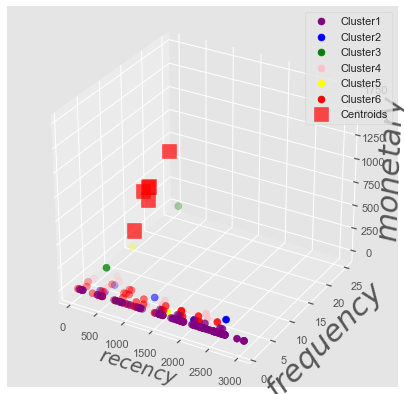

In [11]:
plt.figure('Bismillah', figsize=(7,7))
ax = plt.axes(projection = '3d')

ax.scatter(x[y_means==0,0], x[y_means==0,1],x[y_means==0,1], s=50, c='purple',label='Cluster1')
ax.scatter(x[y_means==1,0], x[y_means==1,1],x[y_means==1,1], s=50, c='blue',label='Cluster2')
ax.scatter(x[y_means==2,0], x[y_means==2,1],x[y_means==2,1], s=50, c='green',label='Cluster3')
ax.scatter(x[y_means==3,0], x[y_means==3,1],x[y_means==3,1], s=50, c='pink',label='Cluster4')
ax.scatter(x[y_means==4,0], x[y_means==4,1],x[y_means==4,1], s=50, c='yellow',label='Cluster5')
ax.scatter(x[y_means==5,0], x[y_means==5,1],x[y_means==5,1], s=50, c='red',label='Cluster6')

ax.set_xlabel('$recency$', fontsize=20, rotation=150)
ax.set_ylabel('$frequency$', fontsize=30)
ax.set_zlabel('$monetary$', fontsize=30, rotation=60)
ax.yaxis._axinfo['label']['space_factor'] = 3.0

ax.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],km6.cluster_centers_[:,0],
          s=200,marker='s',c='red', alpha=0.7, label='Centroids')

ax.legend()

In [12]:
print(km6.labels_)

[1 0 5 5 5 0 0 0 2 5 0 5 0 3 5 0 0 3 0 5 0 3 0 0 0 5 0 5 5 0 0 0 0 0 2 2 0
 1 3 0 0 3 0 0 5 0 0 0 0 3 0 5 5 1 5 5 0 0 0 5 0 0 0 5 5 0 3 0 0 0 5 1 0 1
 3 0 0 5 5 5 0 5 0 0 5 0 5 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 5 0 5 5 5 0 0 4
 1 0 0 3 5 5 0 5 0 5 5 3 3 0 0 5 0 0 5 0 0 0 0 0 0 5 0 5 5 1 5 5 0 4 5 5 0
 5 0 0 0 3 3 0 0 5 0 0 0 3 3 0 5 0 0 3 5 5 5 3 0 0 0 0 0 0 0 5 0 5 3 0 0 5
 5 0 0 5 0 0]


In [13]:
len(dataset)

191

In [14]:
tita = np.array(km6.labels_)

In [15]:
def f(n): 
    return n+1

In [16]:
tita = np.array(list(map(f, km6.labels_)))

In [17]:
tita

array([2, 1, 6, 6, 6, 1, 1, 1, 3, 6, 1, 6, 1, 4, 6, 1, 1, 4, 1, 6, 1, 4,
       1, 1, 1, 6, 1, 6, 6, 1, 1, 1, 1, 1, 3, 3, 1, 2, 4, 1, 1, 4, 1, 1,
       6, 1, 1, 1, 1, 4, 1, 6, 6, 2, 6, 6, 1, 1, 1, 6, 1, 1, 1, 6, 6, 1,
       4, 1, 1, 1, 6, 2, 1, 2, 4, 1, 1, 6, 6, 6, 1, 6, 1, 1, 6, 1, 6, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 6, 1, 6, 6, 6, 1, 1,
       5, 2, 1, 1, 4, 6, 6, 1, 6, 1, 6, 6, 4, 4, 1, 1, 6, 1, 1, 6, 1, 1,
       1, 1, 1, 1, 6, 1, 6, 6, 2, 6, 6, 1, 5, 6, 6, 1, 6, 1, 1, 1, 4, 4,
       1, 1, 6, 1, 1, 1, 4, 4, 1, 6, 1, 1, 4, 6, 6, 6, 4, 1, 1, 1, 1, 1,
       1, 1, 6, 1, 6, 4, 1, 1, 6, 6, 1, 1, 6, 1, 1])

In [18]:
ayu = np.reshape(tita, (-1, 1))

In [19]:
ayu

array([[2],
       [1],
       [6],
       [6],
       [6],
       [1],
       [1],
       [1],
       [3],
       [6],
       [1],
       [6],
       [1],
       [4],
       [6],
       [1],
       [1],
       [4],
       [1],
       [6],
       [1],
       [4],
       [1],
       [1],
       [1],
       [6],
       [1],
       [6],
       [6],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [3],
       [1],
       [2],
       [4],
       [1],
       [1],
       [4],
       [1],
       [1],
       [6],
       [1],
       [1],
       [1],
       [1],
       [4],
       [1],
       [6],
       [6],
       [2],
       [6],
       [6],
       [1],
       [1],
       [1],
       [6],
       [1],
       [1],
       [1],
       [6],
       [6],
       [1],
       [4],
       [1],
       [1],
       [1],
       [6],
       [2],
       [1],
       [2],
       [4],
       [1],
       [1],
       [6],
       [6],
       [6],
       [1],
       [6],
       [1],
    

In [20]:
newArray = np.append(dataset, ayu, axis = 1)

In [21]:
newArray

array([[1.0001000e+04, 1.5220000e+03, 1.0000000e+00, 3.2773758e+07,
        2.0000000e+00],
       [1.0002000e+04, 9.4100000e+02, 1.0000000e+00, 2.7390000e+06,
        1.0000000e+00],
       [1.0003000e+04, 1.9400000e+03, 1.0000000e+00, 9.8681500e+06,
        6.0000000e+00],
       [1.0004000e+04, 1.8850000e+03, 1.0000000e+00, 9.4202500e+06,
        6.0000000e+00],
       [1.0005000e+04, 7.8700000e+02, 4.0000000e+00, 4.7460000e+06,
        6.0000000e+00],
       [1.0006000e+04, 1.9150000e+03, 1.0000000e+00, 2.1765000e+06,
        1.0000000e+00],
       [1.0007000e+04, 2.6430000e+03, 1.0000000e+00, 2.6430000e+06,
        1.0000000e+00],
       [1.0008000e+04, 2.3400000e+03, 1.0000000e+00, 9.5000000e+05,
        1.0000000e+00],
       [1.0009000e+04, 8.9000000e+01, 7.0000000e+00, 7.6142450e+07,
        3.0000000e+00],
       [1.0010000e+04, 4.2900000e+02, 4.0000000e+00, 8.9225000e+06,
        6.0000000e+00],
       [1.0011000e+04, 1.5180000e+03, 1.0000000e+00, 4.2750000e+05,
        1.00

In [22]:
data = newArray.astype(int)

In [23]:
data

array([[   10001,     1522,        1, 32773758,        2],
       [   10002,      941,        1,  2739000,        1],
       [   10003,     1940,        1,  9868150,        6],
       [   10004,     1885,        1,  9420250,        6],
       [   10005,      787,        4,  4746000,        6],
       [   10006,     1915,        1,  2176500,        1],
       [   10007,     2643,        1,  2643000,        1],
       [   10008,     2340,        1,   950000,        1],
       [   10009,       89,        7, 76142450,        3],
       [   10010,      429,        4,  8922500,        6],
       [   10011,     1518,        1,   427500,        1],
       [   10012,     1882,        1,  5011750,        6],
       [   10013,     2405,        1,  1142250,        1],
       [   10014,      364,        6, 12425525,        4],
       [   10015,     1824,        2,  5620000,        6],
       [   10016,     2676,        1,  1224650,        1],
       [   10017,     1453,        1,   800000,        1

In [24]:
resultData = pd.DataFrame({'ID Pelanggan': data[:, 0], 'Recency': data[:, 1], 'Frequency': data[:, 2], 'Monetary': data[:, 3], 'Cluster': data[:, 4]})

In [25]:
resultData

,ID Pelanggan,Recency,Frequency,Monetary,Cluster
0,10001,1522,1,32773758,2
1,10002,941,1,2739000,1
2,10003,1940,1,9868150,6
3,10004,1885,1,9420250,6
4,10005,787,4,4746000,6
5,10006,1915,1,2176500,1
6,10007,2643,1,2643000,1
7,10008,2340,1,950000,1
8,10009,89,7,76142450,3
9,10010,429,4,8922500,6


Keterangan:
    
CLUSTER 1 : DORMANT CUSTOMER
CLUSTER 2 : TYPICAL CUSTOMER
CLUSTER 3 : SUPERSTAR
CLUSTER 4 : EVERYDAY SHOPPER
CLUSTER 5 : GOLDEN CUSTOMER
CLUSTER 6 : OCCATIONAL CUSTOMER

In [26]:
resultData.to_csv('E:/SKRIPSI TITA/clustering/hasil_akhir_clustering.csv',sep=',')